<a href="https://colab.research.google.com/github/kunal077/Financial-Engineering-MTE-Project/blob/main/OptimalTimeUnderCapitalTax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Colab Notebook I want to have scripts related to Implementation of Bellman's Method.
t

In [1]:
!pip install --upgrade quantecon

     |████████████████████████████████| 235kB 9.3MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe
import scipy.sparse as sparse
from quantecon import compute_fixed_point
from quantecon.markov import DiscreteDP

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [3]:
seed = 5       
N  = 2.**6   
def Brownian(N):
                           
    dt = 1./N                                    # time step
    b = np.random.normal(1, 2, int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b
# brownian increments
b = Brownian(N)[1]

# brownian motion
W = Brownian(N)[0]
W = np.insert(W, 0, 0.)                   

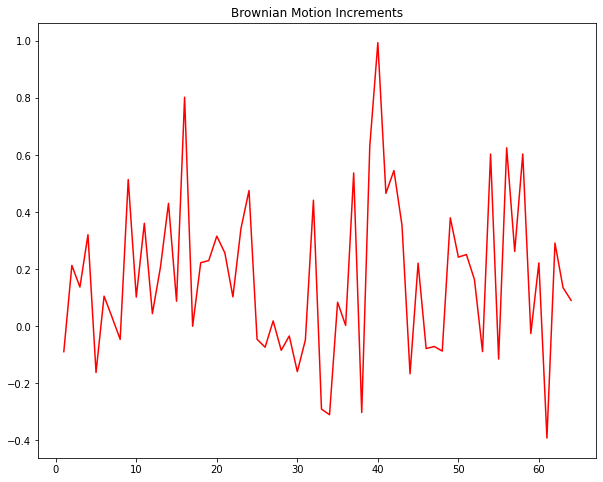

Text(0.5, 1.0, 'Brownian Motion Sample Path')

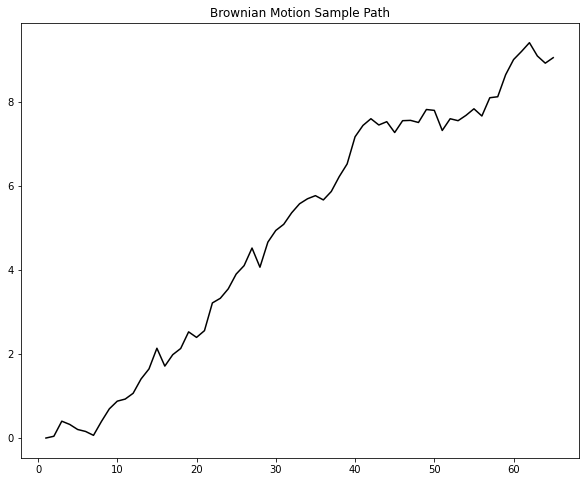

In [4]:
# brownian increments
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
xb = np.linspace(1, len(b), len(b))
plt.plot(xb, b, 'red')
plt.title('Brownian Motion Increments')
plt.show()
plt.close()
xw = np.linspace(1, len(W), len(W))
plt.plot(xw, W, 'black')
plt.title('Brownian Motion Sample Path')
#plt.show()

In [5]:
!pip install ito-diffusions

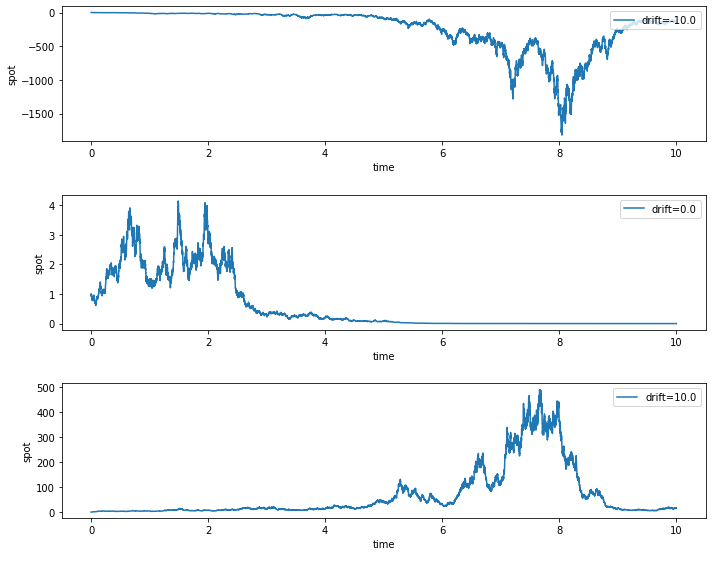

In [6]:
from ito_diffusions import *
fig, axes = plt.subplots(nrows=3, ncols=1)
drifts = [-10.0, 0.0, 10.0]
T = 1
SCHEME_STEPS = int(1e4)
X = pseudo_GBM(x0=1, T=10, scheme_steps=SCHEME_STEPS, drift=0, vol=1)
    
for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.columns = ['drift={}'.format(drift)]
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')   

plt.tight_layout()
plt.show()

In [7]:
import gym
import numpy as np
#make environment
env = gym.make('FrozenLake-v0')
# as the environment is continues there cannot be finite number of states 
states = env.observation_space.n #used if discrete environment

#check number of actions that can be 
actions = env.action_space.n

#initialize value table randomly
value_table = np.zeros((states,1))

def value_iterations(env , n_iterations , gamma = 1.0 , threshold = 1e-30):
    for i in range(n_iterations):
        
        new_valuetable = np.copy(value_table)
        for state in range(states):
            q_value = []
            for action in range(actions):
                next_state_reward = []
                for next_state_parameters in env.env.P[state][action]:
                    transition_prob, next_state, reward_prob, _ = next_state_parameters
                    reward = transition_prob*(reward_prob+gamma*new_valuetable[next_state])
                    next_state_reward.append(reward)
                    
                    
                q_value.append((np.sum(next_state_reward)))
            value_table[state] = max(q_value)
            
        if (np.sum(np.fabs(new_valuetable - value_table))<=threshold):
            break
    return value_table
  

def extract_policy(value_table, gamma = 1.0):
  policy = np.zeros(env.observation_space.n)
  for state in range(env.observation_space.n):
    Q_table = np.zeros(env.action_space.n)
    for action in range(env.action_space.n):
      for next_sr in env.env.P[state][action]:
        transition_prob, next_state, reward_prob, _ = next_sr
        Q_table[action] += (transition_prob * (reward_prob + gamma *value_table[next_state]))
    policy[state] = np.argmax(Q_table)
  return policy
value_table = value_iterations(env,10000)
policy = extract_policy(value_table)
print(policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


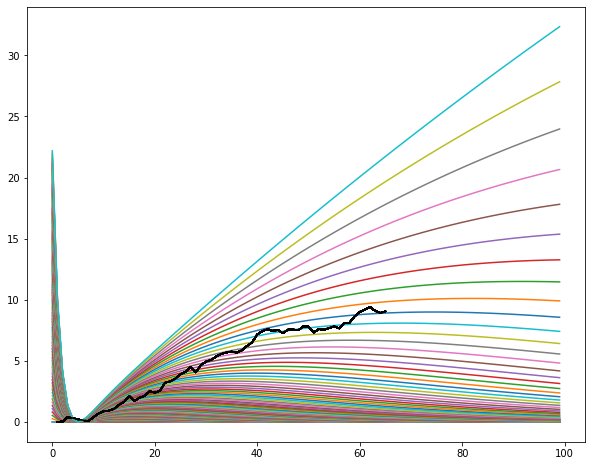

In [8]:
from math import *
def testPlot(alpha, Po):
  alpha = alpha
  Po = Po
  T, r = 5, 0.10 
  mu, sigma = 0.5, 0.20
  xVal_ = [i for i in range(100)]
  yVal = []
  for xVal in range(100):
    y = (alpha*Po)*(exp(r*(1-alpha)*(T-xVal))-1)/(1-alpha)*(exp(mu*(T-xVal))-exp(r*(1-alpha)*(T-xVal)))
    yVal.append(y)

  #print(yVal)
  plt.plot(xVal_, yVal)
  xw = np.linspace(1, len(W), len(W))
  plt.plot(xw, W, 'black')

for i in range(100):
  testPlot(i/100, 4)

plt.show()



In [9]:
from scipy import *
import numpy
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

NameError: ignored